In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Part 1: Inroduce the data and the purpose ###

 The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).


Source: 

https://archive.ics.uci.edu/ml/datasets/bank+marketing


Additon meaching learning study: 

http://www.columbia.edu/~jc4133/ADA-Project.pdf


The purpose of this project is to determine parameter that migh affect the y varaible.  Based on the columbia paper, the duration variable will be the main focus in that we will look at how changes in duration affect the final outcome.  

For this analysis, we will filter the data in the following ways:
1) Use first time calls in order to elimatinat past the infulences of past calls
2) Only use duration over the mean duration (257 s), assuming that this period of time is the most variable sinse it is more likely to go beyond scripted conversation.
3) Campaigns that included more than 30 records in order to reduce the bias of the data.  Campaigns with fewer callers could be influenced by other factors. 


### Part 2: EDA ###



In [2]:
#Upload Data
#df = pd.read_csv("bank\\bank.csv",delimiter=";")
df_add = pd.read_csv("bank\\bank-additional.csv",delimiter=";")
df= df_add



In [3]:
#Sample of the data
pd.set_option('display.max_columns', None)
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
#Dataframe dimensions
df.shape
#4521 records (random data sampled from larger dataset)
#17 columns

(4521, 17)

In [5]:
#Datatype of all fields
df.info()
# data type object mainly represents catagorical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
# Statistics for numeric features
df.describe()

#Average age is 40
#Average duration is around 4 minutes (257 s)
#Over 75% of the calls by a campagin for a given person was 3
#Min pday of 0 means that someone was called back on the same day


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
#Check for missing values
df.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

### Part 3: Data Cleaning/ Filtering / Transformation 

1) Find conversation that last more than average

2) Only focus on first time call success

3) Create catagories by age

In [ ]:
#Create a mask to filter data rows
#set the duration to values greater that mean and to those individuals who were never contacted 
mask = (df.duration > df.duration.mean()) & (df.pdays == 999)



In [12]:
#Divide age (range = 70) into 7 groups
#df.describe()["age"]
df["age_label"] = (df.age.values -18) // 10
#df[["age","age_label"]].head(20)

1) Split data into records with yes target vs the total records

2) Look though all the columns of interest and print out the difference in perentage the counts for each each label.

    a. Percentages are calculated in order to normalize percent comparison)

    b. Positive values =  higher portion of group signifies "yes" outcome 





In [23]:

#df_success = df_add[df_add.campaign.isin(successful_camapigns) & mask]
df_success = df[(df.y == "yes") & mask]
df_control = df[mask]

cols = ["day_of_week","job","marital","loan","education","month","age_label"]
#ToDo: group by age
for c in cols:

    ctrl = df_control[c].value_counts(normalize=True).sort_values().to_frame()*100
    succ = df_success[c].value_counts(normalize=True).sort_values().to_frame()*100
    print()
    display(succ-ctrl)



,day_of_week
fri,-0.916284
mon,2.285012
thu,-2.806380
tue,-1.983475
wed,3.421126


,job
admin.,4.289053
blue-collar,-5.867051
entrepreneur,-0.422152
housemaid,0.140625
management,-1.738911
retired,1.956240
self-employed,-0.653099
services,-1.165573
student,1.093593
technician,1.677214


,marital
unknown,-0.023901
divorced,0.105885
single,4.541122
married,-4.623106


,loan
unknown,-0.658379
yes,1.050794
no,-0.392415


,education
basic.4y,0.360733
basic.6y,-1.850354
basic.9y,-1.866473
high.school,-0.818180
professional.course,0.169528
university.degree,3.853561
unknown,0.151185


,month
apr,2.404793
aug,0.111166
dec,1.189196
jul,-0.964085
jun,4.496377
mar,1.473224
may,-9.981852
nov,-1.733630
oct,1.940398
sep,1.064412


,age_label
0,-0.791222
1,-1.200868
2,-4.887681
3,1.438207
4,3.708212
5,0.467174
6,1.266178


In [34]:

ctrl = df_control["age"].value_counts(normalize=True).sort_values().to_frame()*100
succ = df_success["age"].value_counts(normalize=True).sort_values().to_frame()*100

df_control["age_label"].value_counts(normalize=True)
#ctrl.join(succ,lsuffix="_", )
# Mondays and Wednedays were more successfull
# 

1    0.391070
2    0.287144
3    0.198614
0    0.069284
4    0.042340
5    0.006159
6    0.005389
Name: age_label, dtype: float64

In [ ]:



#cat_cols = ["job","marital","education","default","y"]
cat_cols = ["contact","housing","loan","month","poutcome"]


#fig, axes = plt.subplots(2, 2, figsize=(15,15))
#for i,ax in enumerate(axes.ravel()):
for cat in cat_cols:
    #if the duration is greater than 5 minutes,is there a difference
    sns.boxplot( x=cat,y="duration",data=df[mask]);
    plt.title(cat.capitalize()+  " vs Duration")
    plt.xticks(rotation = 90);
    plt.show();
    
    


In [ ]:

#cat_cols = ["job","marital","education","y"]
cat_cols = ["contact","housing","loan","month","poutcome"]

fig, axes = plt.subplots(2, 2, figsize=(15,15))
for i,ax in enumerate(axes.ravel()):
    sns.boxplot(ax = ax, x=cat_cols[i],y="balance",data=df[df.balance < 10000]);
    plt.xticks(rotation = 90);
    
#Todo: remove outliers form balance
#todo: remove zero days form pdays


In [12]:

df.columns
#df.groupby("campaign").agg({"y":"value_count"})
df_yes = df[["campaign","y"]][df.y == "yes"].value_counts().reset_index()
df_yes.columns = ["campaign","y","yes_count"]
df_total = df[["campaign"]].value_counts().reset_index()
df_total.columns = ["campaign","total_count"]
df_merged = df_yes.merge(df_total, how="inner",on="campaign")


df_merged["percent"] = df_merged.yes_count/df_merged.total_count
successful_camapigns = df_merged[df_merged.total_count > 30].sort_values(by="percent", ascending = False).campaign.to_list()
#total count must be greater thatn 30 as a standard benchmark



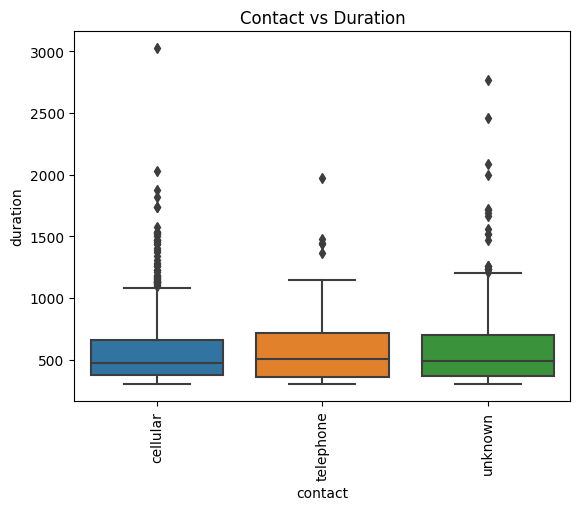

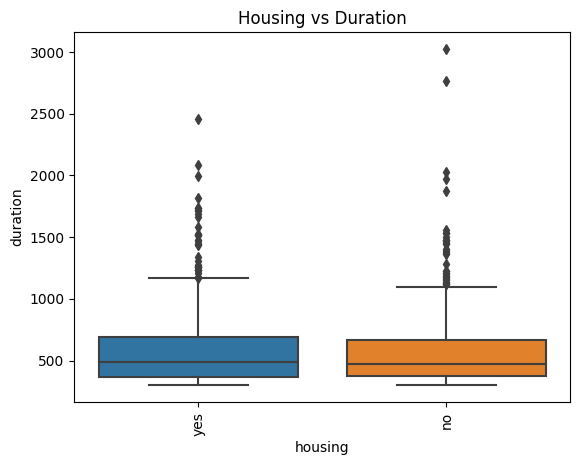

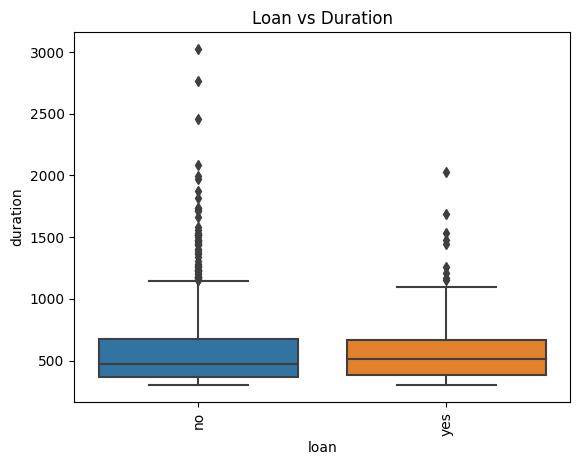

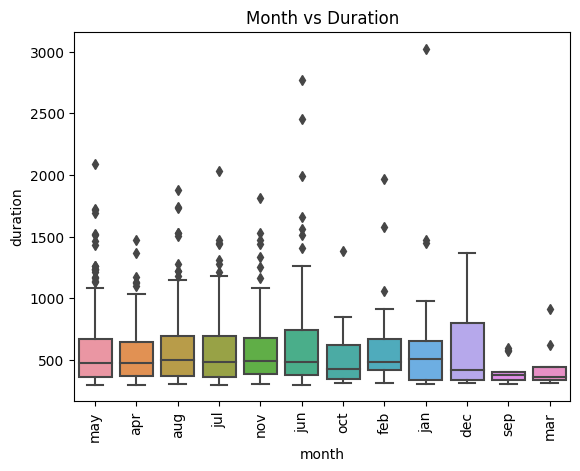

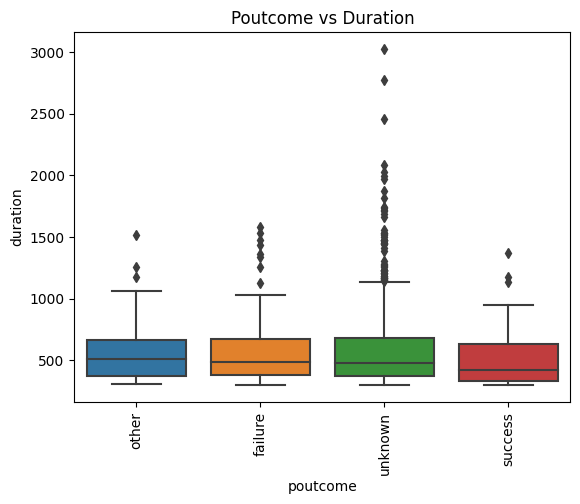

In [41]:
#cat_cols = ["job","marital","education","y"]
cat_cols = ["contact","housing","loan","month","poutcome"]

#fig, axes = plt.subplots(2, 2, figsize=(15,15))
#for i,ax in enumerate(axes.ravel()):
for cat in cat_cols:
    sns.boxplot( x=cat,y="duration",data=df[df.campaign.isin(successful_camapigns) & (df.duration > 300)]);
    plt.title(cat.capitalize()+  " vs Duration")
    plt.xticks(rotation = 90);
    plt.show();
    

C:\Users\Charles P\AppData\Local\Temp\ipykernel_18180\2184453737.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_success = df_add[df_add.campaign.isin(successful_camapigns) & mask]
C:\Users\Charles P\AppData\Local\Temp\ipykernel_18180\2184453737.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_control = df_add[mask]


In [11]:

#df_success = df_add[df_add.campaign.isin(successful_camapigns) & mask]
df_success = df[(df.y == "yes") & mask]
df_control = df[mask]

cols = ["day_of_week","job","marital","loan","education","month","age_label"]
#ToDo: group by age
for c in cols:

    ctrl = df_control[c].value_counts(normalize=True).sort_values()*100
    succ = df_success[c].value_counts(normalize=True).sort_values()*100
    print()
    print(c)
    display(succ-ctrl)


day_of_week


fri   -0.916284
mon    2.285012
thu   -2.806380
tue   -1.983475
wed    3.421126
Name: day_of_week, dtype: float64


job


admin.           4.289053
blue-collar     -5.867051
entrepreneur    -0.422152
housemaid        0.140625
management      -1.738911
retired          1.956240
self-employed   -0.653099
services        -1.165573
student          1.093593
technician       1.677214
unemployed       0.814845
unknown         -0.124784
Name: job, dtype: float64


marital


unknown    -0.023901
divorced    0.105885
single      4.541122
married    -4.623106
Name: marital, dtype: float64


loan


unknown   -0.658379
yes        1.050794
no        -0.392415
Name: loan, dtype: float64


education


basic.4y               0.360733
basic.6y              -1.850354
basic.9y              -1.866473
high.school           -0.818180
professional.course    0.169528
university.degree      3.853561
unknown                0.151185
Name: education, dtype: float64


month


apr    2.404793
aug    0.111166
dec    1.189196
jul   -0.964085
jun    4.496377
mar    1.473224
may   -9.981852
nov   -1.733630
oct    1.940398
sep    1.064412
Name: month, dtype: float64


age_label


0   -0.791222
1   -1.200868
2   -4.887681
3    1.438207
4    3.708212
5    0.467174
6    1.266178
Name: age_label, dtype: float64

fri    0.110153
thu    0.163811
tue   -0.135440
mon   -0.092514
wed   -0.046010
Name: day_of_week, dtype: float64

In [ ]:


df_merged

In [ ]:




fig, axes = plt.subplots(2, 2, figsize=(15,15))
for i,ax in enumerate(axes.ravel()):
    sns.boxplot(ax = ax, x=cat_cols[i],y="previous",data=df[df.previous > 0]);
    plt.xticks(rotation = 90);

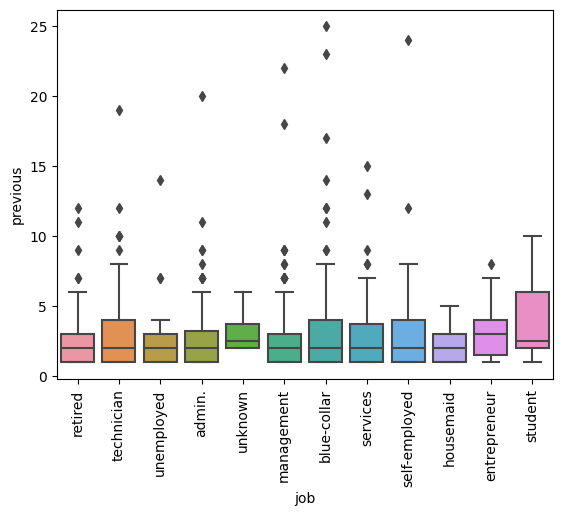

In [113]:
sns.boxplot( x="job",y="previous",data=df[df.previous > 0]);
plt.xticks(rotation = 90);

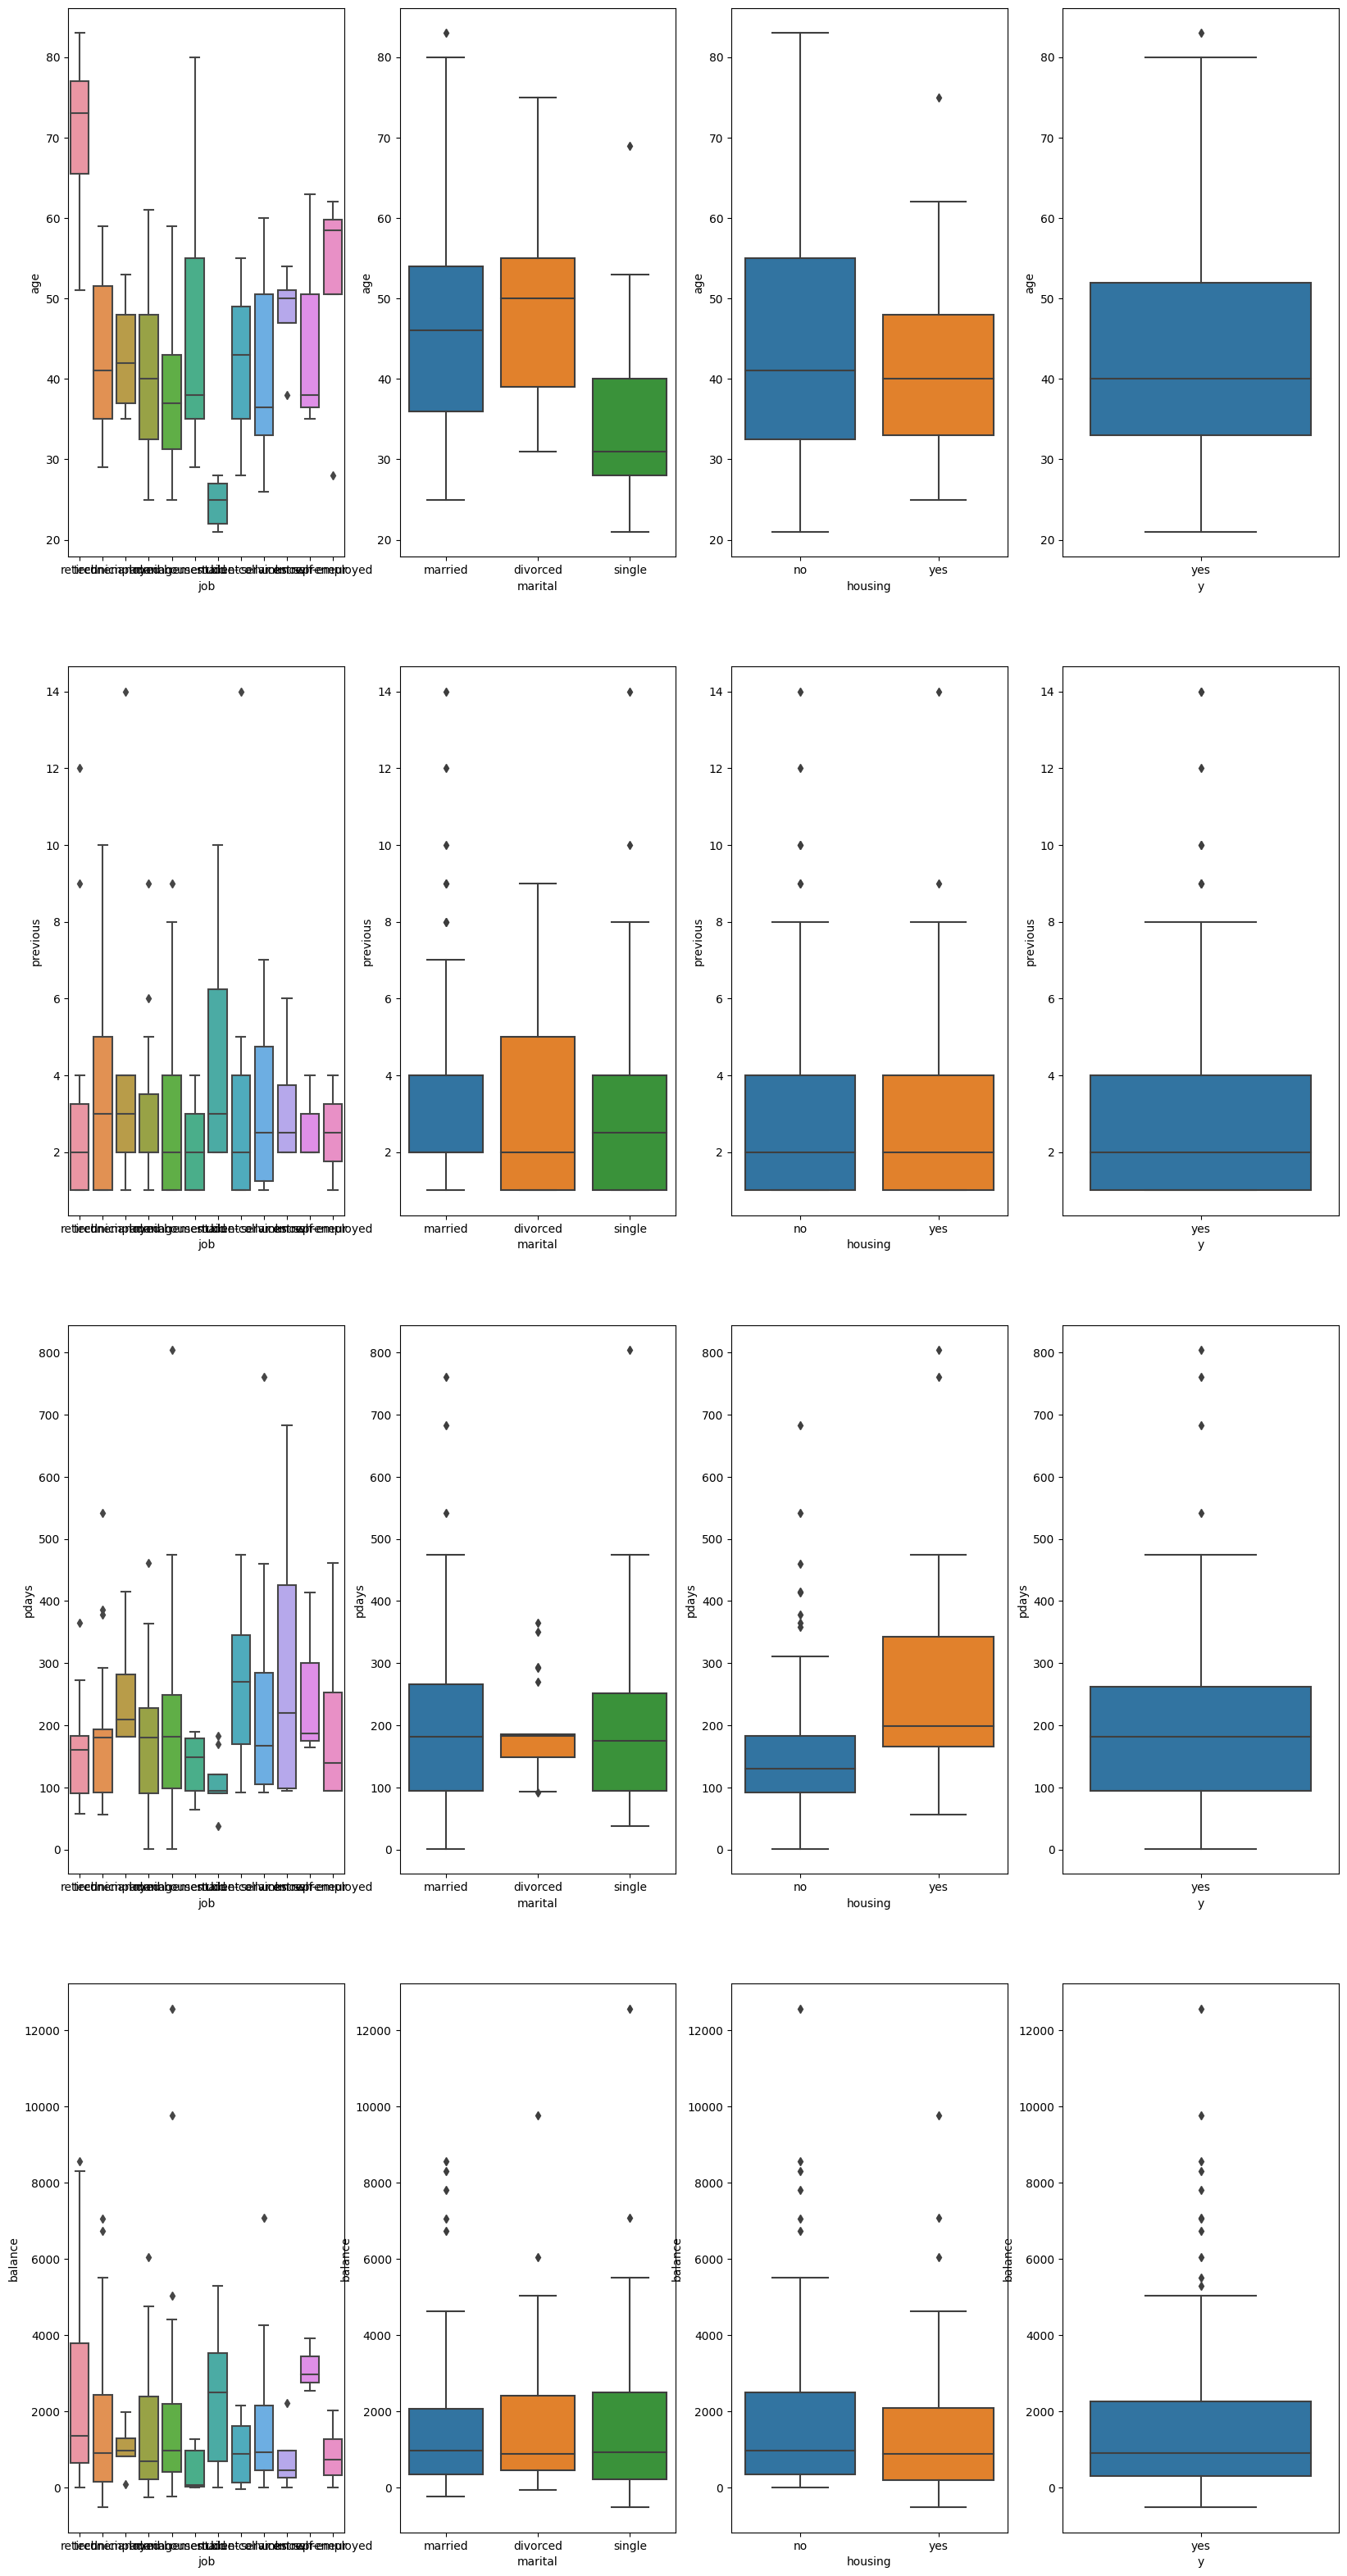

In [136]:

def display_boxplots(df):
    num_cols = ["age","previous","pdays","balance"]
    cat_cols = ["job","marital","housing","y"]
    
    fig, axes = plt.subplots(len(num_cols), len(cat_cols), figsize=(20,40))
    for i,ax in enumerate(axes.ravel()):
        row = i // 4
        col = i % 4
        #print(row,col)
        sns.boxplot(ax=ax, x=cat_cols[col],y=num_cols[row],data=df[df.previous > 0]);
        #plt.xticks(rotation = 90);
display_boxplots(df[df.y == "yes"])    

In [21]:
df_merged["percent"] = df_merged.yes_count/df_merged.total_count
#df[["campaign","y"]].sort_values(by="campaign").value_counts().reset_index()
df_merged

,campaign,y,yes_count,total_count,percent
0,1,yes,240,1734,0.138408
1,2,yes,138,1264,0.109177
2,3,yes,57,558,0.102151
3,4,yes,43,325,0.132308
4,6,yes,16,155,0.103226
5,5,yes,9,167,0.053892
6,7,yes,6,75,0.080000
7,8,yes,4,56,0.071429
8,9,yes,2,30,0.066667
9,13,yes,2,17,0.117647


In [175]:
df_dummy = pd.get_dummies(data=df,columns=["education","housing","loan","job","default","marital"])



In [188]:

len(df.columns)
len(df_dummy.columns)
sel_cols = ["campaign"] + df_dummy.columns[19:].to_list() 
df_dummy2 = df_dummy.groupby("campaign").sum().reset_index()[sel_cols]


C:\Users\Charles P\AppData\Local\Temp\ipykernel_16416\4209622622.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_dummy2 = df_dummy.groupby("campaign").sum().reset_index()[sel_cols]


In [191]:
df_counts = df_merged.merge( df_dummy2,on="campaign",how="inner")

In [198]:
df_counts.sort_values(by="percent", ascending=False)[df_counts.total_count > 10]
#df_counts.loan_yes/df_counts.total_count
#Todo: why not include campaigns with yes = 0
#Todo: month, day,dayofweek

C:\Users\Charles P\AppData\Local\Temp\ipykernel_16416\2848265911.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_counts.sort_values(by="percent", ascending=False)[df_counts.total_count > 10]


,campaign,y,yes_count,total_count,percent,loan_no,loan_yes,job_admin.,job_blue-collar,job_entrepreneur,...,job_services,job_student,job_technician,job_unemployed,job_unknown,default_no,default_yes,marital_divorced,marital_married,marital_single
0,1,yes,240,1734,13.840830,1459,275,207,371,65,...,170,40,265,63,16,1705,29,222,1033,479
3,4,yes,43,325,13.230769,275,50,20,68,9,...,22,4,62,14,2,317,8,34,209,82
9,13,yes,2,17,11.764706,15,2,1,4,1,...,4,1,2,0,0,17,0,2,10,5
1,2,yes,138,1264,10.917722,1088,176,129,254,49,...,122,21,240,23,10,1245,19,139,790,335
4,6,yes,16,155,10.322581,129,26,18,30,2,...,14,3,28,2,2,151,4,21,90,44
2,3,yes,57,558,10.215054,477,81,50,116,28,...,40,10,94,18,4,548,10,61,363,134
6,7,yes,6,75,8.000000,63,12,14,15,3,...,7,0,9,2,1,73,2,6,54,15
7,8,yes,4,56,7.142857,46,10,5,9,4,...,3,0,14,2,1,55,1,8,34,14
8,9,yes,2,30,6.666667,25,5,4,10,0,...,4,1,3,0,1,30,0,3,21,6
5,5,yes,9,167,5.389222,141,26,16,39,3,...,15,3,32,1,1,164,3,20,106,41


<AxesSubplot: ylabel='percent'>

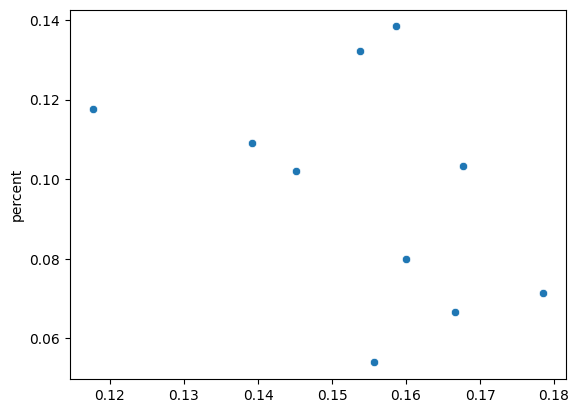

In [218]:
#df_counts.loc[:,df_counts.columns.str.startswith("loan_")]
pct_yes_loan  = df_counts["loan_yes"]/df_counts["total_count"]
#df_counts["percent"] = df_counts["percent"]/100
df_counts["percent"][:10]
sns.scatterplot(x=pct_yes_loan,y=df_counts["percent"][:10],data=df_counts )


In [242]:
select_cols = df_counts.columns[np.array(df_counts.columns.str.startswith("marital_")).tolist()].tolist() + ["percent"]

select_cols
df_counts[select_cols].corr()

#Todo: unemployed correlation 


,marital_divorced,marital_married,marital_single,percent
marital_divorced,1.000000,0.992703,0.998146,0.069210
marital_married,0.992703,1.000000,0.997234,0.064917
marital_single,0.998146,0.997234,1.000000,0.072541
percent,0.069210,0.064917,0.072541,1.000000


<AxesSubplot: xlabel='y', ylabel='duration'>

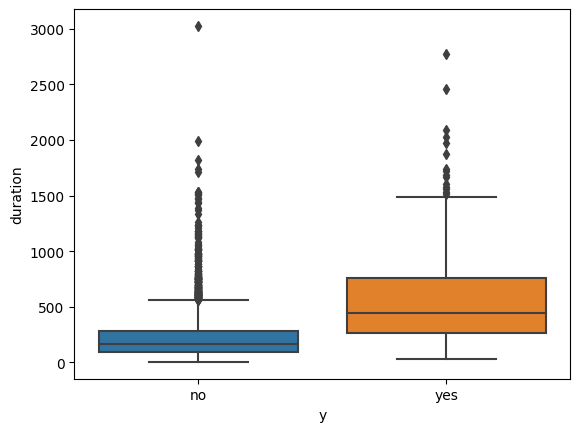

In [245]:
#Todo: Include this graph
sns.boxplot(x="y",y="duration",data=df)

In [251]:
d ={}
d["duration"] = ["max","median","min","count","mean","sum"]
df.groupby("month").agg(d)
#Todo: include


duration                                     
           max median min count        mean     sum
month                                              
apr       1472  224.0   5   293  294.354949   86246
aug       1877  159.0   5   633  243.742496  154289
dec       1370  317.5  69    20  416.900000    8338
feb       1971  176.0   8   222  255.698198   56765
jan       3025  181.5  24   148  269.540541   39892
jul       2029  186.5   5   706  271.205382  191471
jun       2769  163.0   5   531  252.425612  134038
mar        910  164.0  30    49  198.897959    9746
may       2087  198.0   4  1398  267.316166  373708
nov       1816  183.0   6   389  272.066838  105834
oct       1386  223.0   5    80  272.800000   21824
sep        595  184.5   9    52  215.730769   11218

(array([1, 2, 3, 4, 5]),
 [Text(1, 0, '(duration, max)'),
  Text(2, 0, '(duration, median)'),
  Text(3, 0, '(duration, min)'),
  Text(4, 0, '(duration, count)'),
  Text(5, 0, '(duration, mean)')])

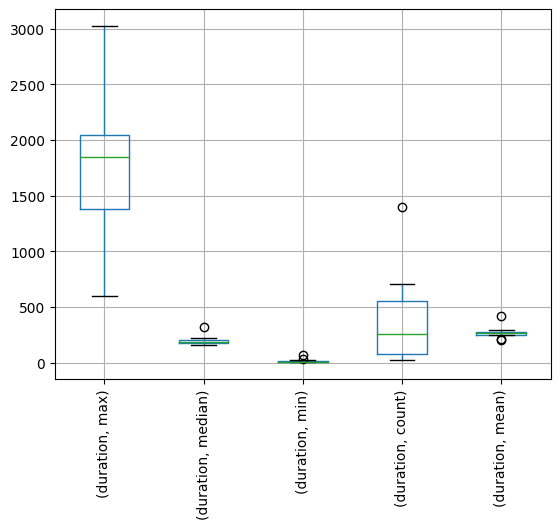

In [255]:
d ={}
d["duration"] = ["max","median","min","count","mean"]
df.groupby("month").agg(d).boxplot()
plt.xticks(rotation = 90)


<AxesSubplot: xlabel='month', ylabel='duration'>

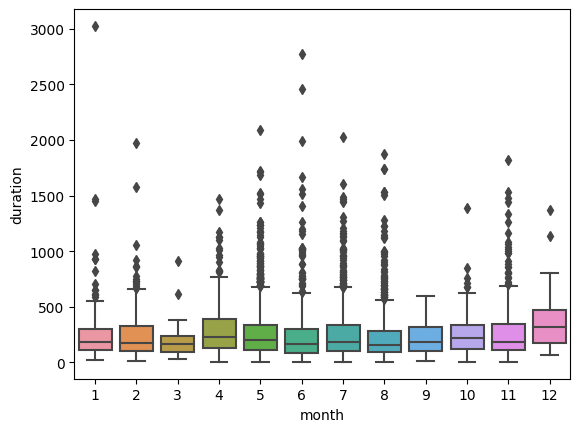

In [262]:
sns.boxplot(x="month", y="duration", data= df.sort_values(by="month"))
#Todo: include

In [264]:
df[df.y=="yes"].groupby(["month","y"])["duration"].sum().reset_index()

,month,y,duration
0,1,yes,8360
1,2,yes,17135
2,3,yes,5248
3,4,yes,24710
4,5,yes,63990
5,6,yes,35210
6,7,yes,45193
7,8,yes,45562
8,9,yes,5019
9,10,yes,12567


In [260]:

day_month = pd.to_datetime(df["month"] + "/"  +df["day"].astype(str) + "/2022" )
df["month"] = day_month.dt.month


In [84]:
df.month.unique()

array([10,  5,  4,  6,  2,  8,  1,  7, 11,  9,  3, 12], dtype=int64)

In [85]:

df_temp = df.sort_values(["campaign","month","day"]).reset_index().reset_index()
cols = df_temp.columns.tolist() #[0] = ["chrono_order"] #,"orig_order"]
cols[:2] = ["chrono_order","orig_order"]
df_temp.columns = cols
df = df_temp
#df["chrono_order"] = np.arange(df.sort_values(["campaign","month","day"]).shape[0])
#reset_index(drop=True)



<AxesSubplot: xlabel='chrono_order'>

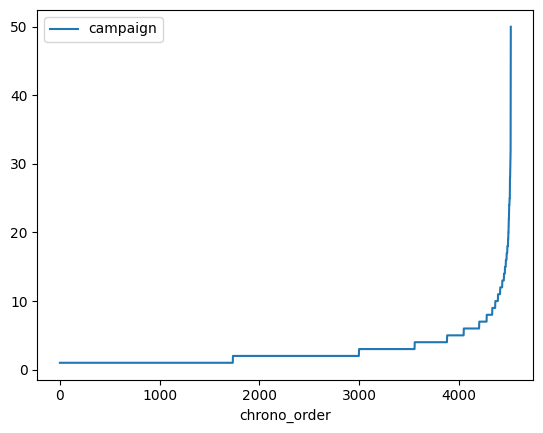

In [86]:
#campaigns over time
df.plot(x ="chrono_order",y ="campaign", kind="line")


In [87]:
d= {}
d["duration"]  = ["sum","count"]
df_camp = df.groupby(["campaign","month","day"]).agg(d).reset_index()
#df_camp[df_camp["campaign"] == 3]   .plot(x="day",y="duration")

x = []
df_camp.columns = ["campaign","month","day","duration","count"]


In [75]:
df_camp

,campaign,month,day,duration,count
0,1,10,1,3022,17
1,1,10,2,11926,58
2,1,10,3,8946,39
3,1,10,4,13623,55
4,1,10,5,25189,93
...,...,...,...,...,...
360,31,10,28,33,1
361,32,10,2,29,1
362,32,10,16,192,1
363,44,10,31,18,1


<AxesSubplot: xlabel='day', ylabel='count'>

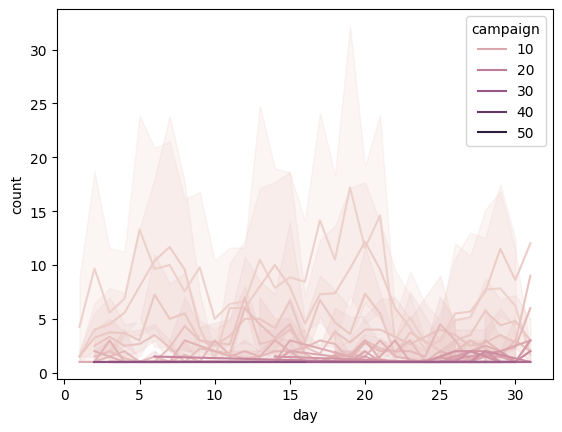

In [92]:
sns.lineplot(data=df_camp, x="day", y="count",hue="campaign")

In [76]:
d= {}
d["duration"]  = ["sum","count"]
df_camp = df.groupby(["campaign","month"]).agg(d).reset_index()
#df_camp[df_camp["campaign"] == 3]   .plot(x="day",y="duration")

x = []

df_camp.columns = ["campaign","month","duration","count"]



In [79]:
df.month.unique()

array([10], dtype=int64)

<AxesSubplot: xlabel='month', ylabel='count'>

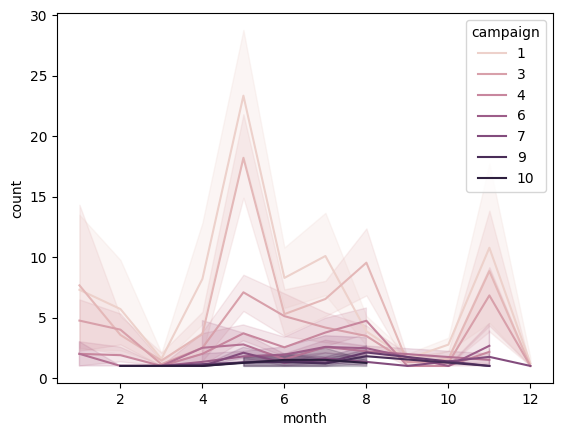

In [90]:
sns.lineplot(data=df_camp[df_camp.campaign < 11], x="month", y="count",hue="campaign")

In [ ]:
df  

In [ ]:

a = {}
a["age"] = ["mean","median"]
a["balance"] = ["mean","median"]
df.groupby("job").agg(a)


<AxesSubplot: >

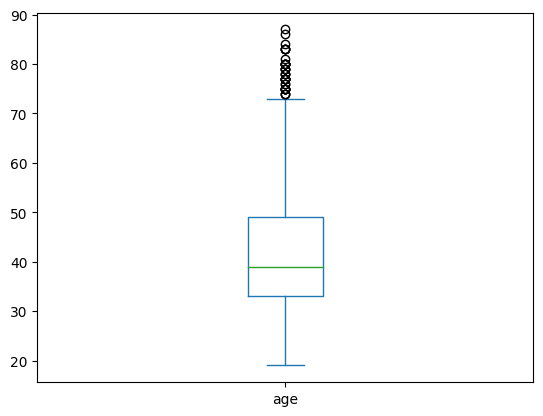

In [20]:

df["age"].sort_values().to_frame().reset_index(drop=True).plot(kind="box")


In [36]:
df["purpose"].value_counts()

radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliance      12
other                   12
retraining               9
vacation                 0
Name: purpose, dtype: int64

<AxesSubplot: >

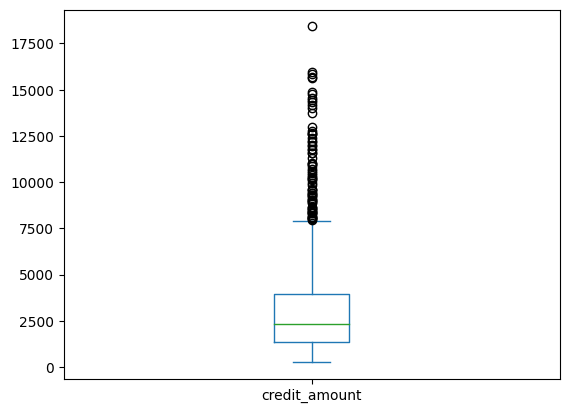

In [40]:
df["credit_amount"].plot(kind="box")



In [25]:
#EDA
mask = df.y == "yes"
df[mask]["loan"].value_counts(normalize=True)*100


no     91.746641
yes     8.253359
Name: loan, dtype: float64

In [31]:

vc = df[["y","loan","job","marital","education"]].value_counts().to_frame()


In [35]:
import seaborn as sns


<AxesSubplot: xlabel='education', ylabel='age'>

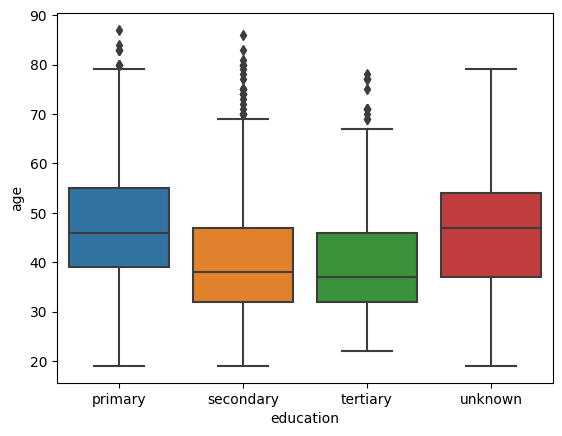

In [37]:

sns.boxplot(x="education",y ="age",data=df)


<AxesSubplot: >

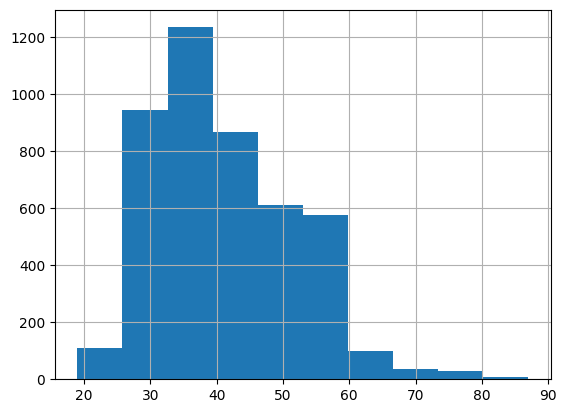

In [38]:
df["age"].hist()